# CyberBullying Detection


**Datasets are collected from the following links :**

* [https://data.mendeley.com/datasets/jf4pzyvnpj/1](https://data.mendeley.com/datasets/jf4pzyvnpj/1)
* [https://www.kaggle.com/vkrahul/twitter-hate-speech?select=train_E6oV3lV.csv](https://www.kaggle.com/vkrahul/twitter-hate-speech?select=train_E6oV3lV.csv)


**Glove Embeddings link :**
* [https://nlp.stanford.edu/data/glove.6B.zip](https://nlp.stanford.edu/data/glove.6B.zip)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Data pre-processing

In [ ]:
dataset_path = "/content/drive/MyDrive/yBully-dataset/"

#### Kaggle Dataset Cleaning

In [ ]:
kaggle_data = pd.read_csv(dataset_path + "kaggle_parsed_dataset.csv")
kaggle_data.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [ ]:
kaggle_data.isna().sum()

index          0
oh_label       0
Date        1242
Text           0
dtype: int64

In [ ]:
kaggle_data = kaggle_data.drop(['index', 'Date'], axis=1)
kaggle_data.head()

,oh_label,Text
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


#### Twitter Data Cleaning

In [ ]:
twitter_data = pd.read_csv(dataset_path + "./twitter_parsed_dataset.csv")
twitter_data.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [ ]:
twitter_data = twitter_data.drop(['index', 'id', 'Annotation'], axis=1)
twitter_data.head()

,Text,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


#### Aggression Data Cleaning

In [ ]:
aggression_data = pd.read_csv(dataset_path + "./aggression_parsed_dataset.csv")
aggression_data.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [ ]:
aggression_data = aggression_data.drop(['ed_label_0', 'ed_label_1', 'index'], axis=1)
aggression_data.head()

,Text,oh_label
0,`- This is not ``creative``. Those are the di...,0
1,` :: the term ``standard model`` is itself le...,0
2,"True or false, the situation as of March 200...",0
3,"Next, maybe you could work on being less cond...",0
4,This page will need disambiguation.,0


#### Attack Dataset Cleaning

In [ ]:
attack_data = pd.read_csv(dataset_path +"./attack_parsed_dataset.csv")
attack_data.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,1.000000,0.000000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [ ]:
attack_data = attack_data.drop(['ed_label_0', 'ed_label_1', 'index'], axis=1)
attack_data.head()

,Text,oh_label
0,`- This is not ``creative``. Those are the di...,0
1,` :: the term ``standard model`` is itself le...,0
2,"True or false, the situation as of March 200...",0
3,"Next, maybe you could work on being less cond...",0
4,This page will need disambiguation.,0


#### Toxicity Data Cleaning

In [ ]:
toxicity_data = pd.read_csv(dataset_path +"./toxicity_parsed_dataset.csv")
toxicity_data.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


In [ ]:
n = len(pd.unique(toxicity_data['Text']))
print("Unique -", n)
print("Total -", toxicity_data.shape[0])
print("Duplicates", toxicity_data.shape[0] - n)
print(toxicity_data.shape)

Unique - 159388
Total - 159686
Duplicates 298
(159686, 5)


In [ ]:
toxicity_data = toxicity_data.drop(['ed_label_0', 'ed_label_1', 'index'], axis=1)
toxicity_data.head()
print(toxicity_data.shape)

(159686, 2)


#### Youtube Data Cleaning

In [ ]:
youtube_data = pd.read_csv(dataset_path +"./youtube_parsed_dataset.csv")
youtube_data.head()

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [ ]:
youtube_data = youtube_data.drop(['index', 'UserIndex', 'Number of Comments', 'Number of Subscribers', 'Membership Duration', 'Number of Uploads', 'Profanity in UserID', 'Age'], axis=1)
youtube_data.head()

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


#### Twitter Dataset 2

In [ ]:
twitter_data2 = pd.read_csv(dataset_path + 'twitter_2.csv')
twitter_data2.rename(columns={'label': 'oh_label', 'tweet': 'Text'}, inplace = True)
twitter_data2 = twitter_data2.drop(['id'], axis = 1)
twitter_data2.head()

,oh_label,Text
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


#### Merging all Data

In [ ]:
final_data = pd.concat([kaggle_data, twitter_data, aggression_data, attack_data, toxicity_data, youtube_data, twitter_data2])

In [ ]:
print("Data Shape : ",final_data.shape)
print("Total Data : ",final_data.shape[0])

Data Shape :  (452917, 2)
Total Data :  452917


In [ ]:
final_data.head()

,oh_label,Text
0,1.0,"""You fuck your dad."""
1,0.0,"""i really don't understand your point.\xa0 It ..."
2,0.0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0.0,"""listen if you dont wanna get married to a man..."
4,0.0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


## Exploratory Data Analysis

In [ ]:
final_data.isna().sum()

oh_label    3
Text        1
dtype: int64

In [ ]:
master_data = final_data.dropna()
master_data.isna().sum()

oh_label    0
Text        0
dtype: int64

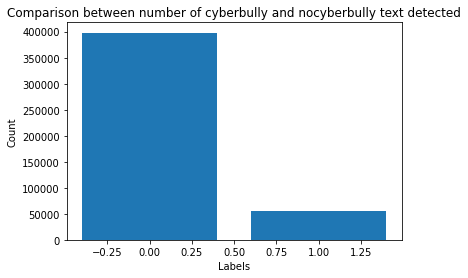

[397941, 54973]
Count of Cyberbully data =  54973
Count of No Cyberbully data =  397941


In [ ]:
cyberbully = master_data[master_data.oh_label==1.0].count()[0]
nocyberbully = master_data[master_data.oh_label==0.0].count()[0]
value = [nocyberbully, cyberbully]
labels = [ "no-cyberbully", "cyberbully"]
plt.figure(figsize=(6,4))
plt.bar(np.arange(len(value)),value);
plt.title("Comparison between number of cyberbully and nocyberbully text detected")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()
print(value)
print("Count of Cyberbully data = ",cyberbully)
print("Count of No Cyberbully data = ",nocyberbully)

Find and Remove Duplicate Text

In [ ]:
n = len(pd.unique(master_data['Text']))
print("Unique -" , n)
print("Total -", master_data.shape[0])
print("Duplicates", master_data.shape[0] - n)
print(master_data.shape)

Unique - 255281
Total - 452914
Duplicates 197633
(452914, 2)


In [ ]:
nondup_data = master_data.drop_duplicates(subset='Text', keep="first")
nondup_data = nondup_data[~(nondup_data['Text'].duplicated(keep=False))]

In [ ]:
print(nondup_data.shape)
nondup_data.head()

(255281, 2)


,oh_label,Text
0,1.0,"""You fuck your dad."""
1,0.0,"""i really don't understand your point.\xa0 It ..."
2,0.0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0.0,"""listen if you dont wanna get married to a man..."
4,0.0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


## Contraction Mapping

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    text = text.split() # to convert have'nt -> have not
    for i in range(len(text)):
        word = text[i]
        if word in contraction_mapping:
            text[i] = contraction_mapping[word]
    text = " ".join(text)
    text = text.replace("'s",'') # to convert your's -> your
    return text

In [ ]:
new_list_1 = []
for text in nondup_data['Text']:
    new_list_1.append(re.sub(r'[^a-zA-Z0-9. ]','',expand_contractions(text)))
new_list_1[1:5]

['i really do not understand your point.xa0 It seems that you are mixing apples and oranges.',
 'Axc2xa0majority of Canadians can and has been wrong before now and will be again.nnUnless you are supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them the breaks and we can always regard you as collateral damage like in wartime  and sorry butxc2xa0the cheques in the mail. ',
 'listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him thought you wasnt suppose to judge people.',
 'Cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1ec3u txecnh 2011 cxf3 xf4n hoxe0 khxf4ng  nCxe1c ngu01b0 dxe2n ngu1ed3i cuxed u0111u1ea7u chiu1ee5 nhu1ee5c cxf3 xf4n hoxe0 khxf4ng nCxe1c nxf4ng dxe2n giu1eef u0111u1ea5t u1edf Vu0103n Giang Cu1ea7n Thu01a

In [ ]:
nondup_data['Updated_Text'] = new_list_1
nondup_data['Updated_Text'] = nondup_data['Updated_Text'].str.lower()
nondup_data.head()

,oh_label,Text,Updated_Text
0,1.0,"""You fuck your dad.""",you fuck your dad.
1,0.0,"""i really don't understand your point.\xa0 It ...",i really do not understand your point.xa0 it s...
2,0.0,"""A\\xc2\\xa0majority of Canadians can and has ...",axc2xa0majority of canadians can and has been ...
3,0.0,"""listen if you dont wanna get married to a man...",listen if you dont wanna get married to a man ...
4,0.0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...


In [ ]:
nondup_data.shape

(255281, 3)

In [ ]:
nondup_data.reset_index(inplace=True, drop=True)
master_data = pd.DataFrame([nondup_data.Updated_Text, nondup_data.oh_label]).transpose()
master_data = master_data.rename(columns={"Updated_Text": "text", "oh_label": "label"})
master_data.head()

,text,label
0,you fuck your dad.,1
1,i really do not understand your point.xa0 it s...,0
2,axc2xa0majority of canadians can and has been ...,0
3,listen if you dont wanna get married to a man ...,0
4,cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...,0


## Train Test Split

In [ ]:
y = master_data.label
x = master_data.text

In [ ]:
train_data, test_data = train_test_split(master_data, test_size=0.2, random_state=7)
print("Training Data size:", len(train_data))
print("Testing Data size", len(test_data))

Training Data size: 204224
Testing Data size 51057


In [ ]:
train_data.head()

,text,label
235711,first daily cat collage impression cats katzen...,0
182090,this is worth a comment at the good article r...,0
97441,id just like to refer any interested readers t...,0
24621,maxblumenthal ajzionts has bloomenthal ever wr...,1
197460,we go with most iconic not most recent. that v...,0


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelEncoder

In [ ]:
MAXLENGTH = 30

## Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 287353


In [ ]:
import pickle

# saving
with open(dataset_path + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
list(word_index.items())[:10]

[('the', 1),
 ('to', 2),
 ('i', 3),
 ('a', 4),
 ('and', 5),
 ('of', 6),
 ('you', 7),
 ('is', 8),
 ('that', 9),
 ('it', 10)]

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAXLENGTH, padding='pre')
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAXLENGTH, padding='pre')

print("Training Shape:",x_train.shape)
print("Testing Shape:",x_test.shape)

Training Shape: (204224, 30)
Testing Shape: (51057, 30)


In [ ]:
print(train_data.text[:5],"\n\n")
print(x_train[:5])

235711    first daily cat collage impression cats katzen...
182090     this is worth a comment at the good article r...
97441     id just like to refer any interested readers t...
24621     maxblumenthal ajzionts has bloomenthal ever wr...
197460    we go with most iconic not most recent. that v...
Name: text, dtype: object 


[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0   111  1963  1990 11422  2136  4056
  74922 74923   597  7119    45   511]
 [    0     0     0     0     0     0     0     0     0     0     0    14
      8   918     4   204    32     1    94    26  9726     6    14    26
     19    10     8     4  1282  1740]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0  1506    49    45     2   899    57   531
   1012     2    28   791   204   458]
 [    0     0     0     0     0     0     0     0     0     0     0     0
   4038 38893    47 74924   298   38

In [ ]:
labels = train_data.label.unique().tolist()
print(labels)

[0.0, 1.0]


In [ ]:
y_train = train_data.label
y_train.shape

(204224,)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (204224, 1)
y_test shape: (51057, 1)


In [ ]:
print(y_train)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Glove Embeddings

In [ ]:
!unzip drive/MyDrive/yBully-dataset/glove.6B.zip

Archive:  drive/MyDrive/yBully-dataset/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embeddings_index = {}
GLOVE_PATH = './glove.6B.300d.txt'
f = open(GLOVE_PATH)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
list(embeddings_index.items())[:3]

[('the',
  array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
          2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
         -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
          2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
         -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
         -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
          9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
         -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
          1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
          2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
          1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
          2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
         -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
         -4.4640e-01,  1.7197

In [ ]:
EMBEDDING_DIM = 300

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix[:10]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04656   ,  0.21318001, -0.0074364 , ...,  0.0090611 ,
        -0.20988999,  0.053913  ],
       [-0.25756001, -0.057132  , -0.67189997, ..., -0.16043   ,
         0.046744  , -0.070621  ],
       ...,
       [-0.28426999,  0.047977  , -0.15062   , ..., -0.090071  ,
         0.016922  ,  0.29278001],
       [-0.1749    ,  0.22956   ,  0.24924   , ..., -0.24131   ,
        -0.40402001,  0.054744  ],
       [-0.18256   ,  0.49851   , -0.1639    , ..., -0.27224001,
        -0.19107001, -0.094104  ]])

In [ ]:
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.show()

    #plot F1
    plt.title('F1 score')
    plt.plot(history.history['f1_m'], color='blue', label='train')
    plt.plot(history.history['val_f1_m'], color='red', label='test')
    plt.ylabel('F1 score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.show()

    #plot Recall
    plt.title('Recall')
    plt.plot(history.history['recall'], color='blue', label='train')
    plt.plot(history.history['val_recall'], color='red', label='test')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.show()

## Model Training

In [ ]:
import keras
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
from keras.losses import binary_crossentropy
from keras.metrics import binary_accuracy
from keras import backend as K
from keras.callbacks import *

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      f1_m
]

### LSTM

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, LSTM, Dense, Input, Dropout, Conv1D, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
embedding_layer = layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAXLENGTH,
                                          trainable=False)

sequence_input = Input(shape=(MAXLENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
lstm_model = tf.keras.Model(sequence_input, outputs)

In [ ]:
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           86205900  
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 300)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                             

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
lstm_history = lstm_model.fit(x_train, y_train, batch_size=512, epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
399/399 [==============================] - 102s 237ms/step - loss: 0.2267 - tp: 7750.0000 - fp: 3407.0000 - tn: 179081.0000 - fn: 13986.0000 - accuracy: 0.9148 - precision: 0.6946 - recall: 0.3566 - auc: 0.8785 - prc: 0.5656 - f1_m: 0.4447 - val_loss: 0.1942 - val_tp: 3123.0000 - val_fp: 1459.0000 - val_tn: 44130.0000 - val_fn: 2345.0000 - val_accuracy: 0.9255 - val_precision: 0.6816 - val_recall: 0.5711 - val_auc: 0.9211 - val_prc: 0.6871 - val_f1_m: 0.6189
Epoch 2/15
399/399 [==============================] - 94s 234ms/step - loss: 0.1942 - tp: 10475.0000 - fp: 3825.0000 - tn: 178663.0000 - fn: 11261.0000 - accuracy: 0.9261 - precision: 0.7325 - recall: 0.4819 - auc: 0.9151 - prc: 0.6677 - f1_m: 0.5782 - val_loss: 0.1839 - val_tp: 3247.0000 - val_fp: 1392.0000 - val_tn: 44197.0000 - val_fn: 2221.0000 - val_accuracy: 0.9292 - val_precision: 0.6999 - val_recall: 0.5938 - val_auc: 0.9278 - val_prc: 0.7095 - val_f1_m: 0.6400
Epoch 3/15
399/399 [==============================] 

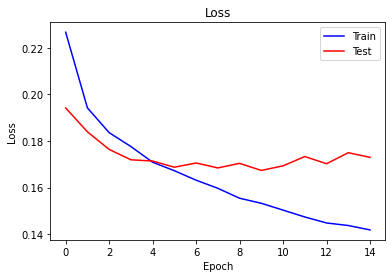

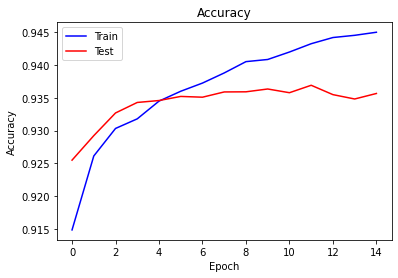

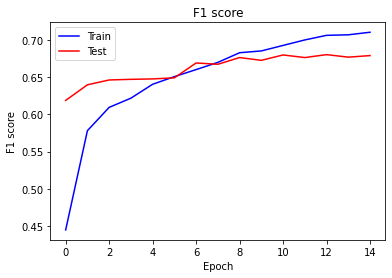

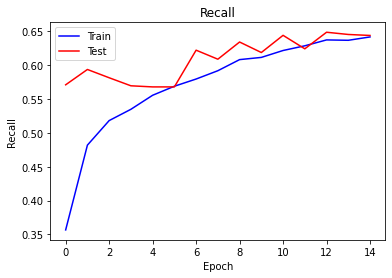

In [ ]:
plot_history(lstm_history)

In [ ]:
print(lstm_history.history)

{'loss': [0.22671544551849365, 0.1942182034254074, 0.18357805907726288, 0.17761485278606415, 0.17086593806743622, 0.16722148656845093, 0.16315467655658722, 0.1596653312444687, 0.15539807081222534, 0.1532330960035324, 0.1502894163131714, 0.1473483443260193, 0.14477217197418213, 0.14368340373039246, 0.1417883336544037], 'tp': [7750.0, 10475.0, 11264.0, 11627.0, 12078.0, 12368.0, 12600.0, 12867.0, 13224.0, 13295.0, 13517.0, 13668.0, 13857.0, 13845.0, 13953.0], 'fp': [3407.0, 3825.0, 3755.0, 3818.0, 3716.0, 3698.0, 3675.0, 3626.0, 3630.0, 3634.0, 3623.0, 3515.0, 3511.0, 3430.0, 3442.0], 'tn': [179081.0, 178663.0, 178733.0, 178670.0, 178772.0, 178790.0, 178813.0, 178862.0, 178858.0, 178854.0, 178865.0, 178973.0, 178977.0, 179058.0, 179046.0], 'fn': [13986.0, 11261.0, 10472.0, 10109.0, 9658.0, 9368.0, 9136.0, 8869.0, 8512.0, 8441.0, 8219.0, 8068.0, 7879.0, 7891.0, 7783.0], 'accuracy': [0.9148337244987488, 0.9261301159858704, 0.9303362965583801, 0.9318052530288696, 0.9345130920410156, 0.93602

### Bidirectional LSTM


In [ ]:
sequence_input = Input(shape=(MAXLENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
bidir_model = tf.keras.Model(sequence_input, outputs)

In [ ]:
bidir_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=[METRICS])


In [ ]:
bidir_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           86205900  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 30, 300)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0   

In [ ]:
bidir_history = bidir_model.fit(x_train, y_train, batch_size=512, epochs=15,
                    validation_data=(x_test, y_test))


Epoch 1/15
399/399 [==============================] - 190s 456ms/step - loss: 0.2223 - tp: 11625.0000 - fp: 4886.0000 - tn: 223191.0000 - fn: 15579.0000 - accuracy: 0.9198 - precision: 0.7041 - recall: 0.4273 - auc: 0.8961 - prc: 0.6177 - f1_m: 0.4599 - val_loss: 0.1891 - val_tp: 2819.0000 - val_fp: 1027.0000 - val_tn: 44562.0000 - val_fn: 2649.0000 - val_accuracy: 0.9280 - val_precision: 0.7330 - val_recall: 0.5155 - val_auc: 0.9225 - val_prc: 0.6931 - val_f1_m: 0.6029
Epoch 2/15
399/399 [==============================] - 181s 454ms/step - loss: 0.1880 - tp: 10828.0000 - fp: 3783.0000 - tn: 178705.0000 - fn: 10908.0000 - accuracy: 0.9281 - precision: 0.7411 - recall: 0.4982 - auc: 0.9214 - prc: 0.6860 - f1_m: 0.5923 - val_loss: 0.1783 - val_tp: 3113.0000 - val_fp: 1107.0000 - val_tn: 44482.0000 - val_fn: 2355.0000 - val_accuracy: 0.9322 - val_precision: 0.7377 - val_recall: 0.5693 - val_auc: 0.9311 - val_prc: 0.7200 - val_f1_m: 0.6401
Epoch 3/15
399/399 [==============================

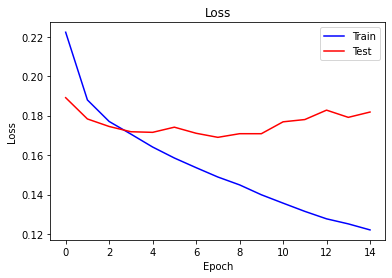

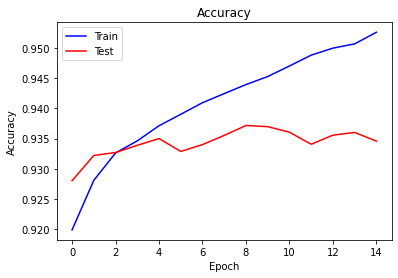

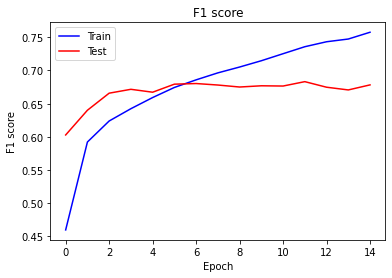

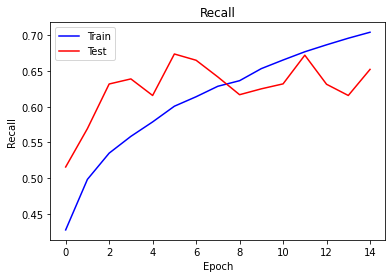

In [ ]:
plot_history(bidir_history)
